In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2
import rasterio

In [2]:
train_imgs = glob('./sm_dataset/train_img/*.tif')
test_imgs = glob('./sm_dataset/test_img/*.tif')
train_masks = glob('./sm_dataset/train_mask/*.tif')

In [3]:
import pandas as pd
pd.read_csv('./sm_dataset/train_meta.csv').shape

(33575, 2)

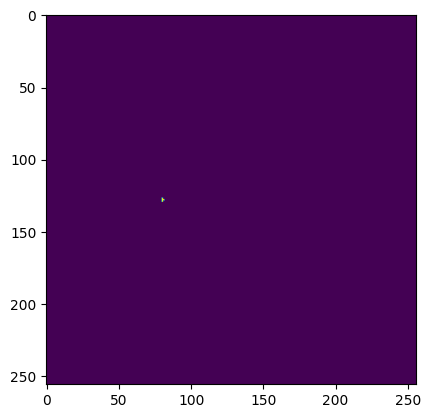

In [4]:
mask = rasterio.open(train_masks[11]).read().transpose(1,2,0)
plt.imshow(mask)

In [6]:
mask.sum().sum()

4

In [7]:
data = rasterio.open(train_imgs[0])
data.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 256, 'height': 256, 'count': 10, 'crs': CRS.from_epsg(32635), 'transform': Affine(30.0, 0.0, 464385.0,
       0.0, -30.0, -3541005.0), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}

In [8]:
data.bounds

BoundingBox(left=464385.0, bottom=-3548685.0, right=472065.0, top=-3541005.0)

In [9]:
data.lnglat()

(26.663454750705686, -32.03933318033548)

In [10]:
data.res

(30.0, 30.0)

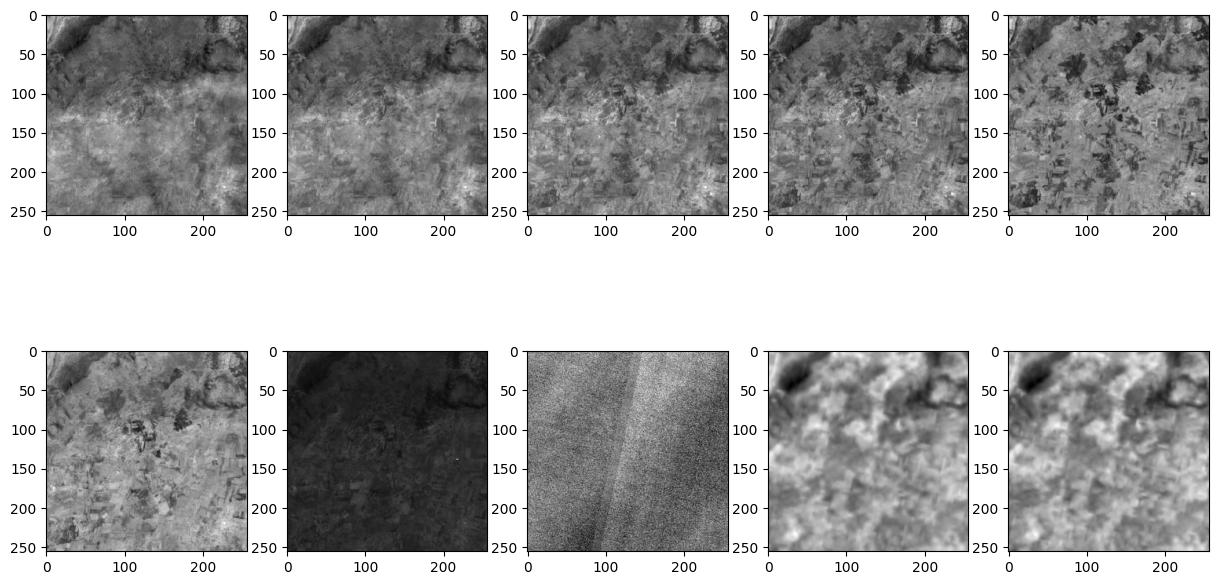

In [19]:
img = rasterio.open(train_imgs[10]).read().transpose(1,2,0)
img_8 = img/(2**16)

fig,axs = plt.subplots(2,5)
fig.set_figheight(8)
fig.set_figwidth(15)
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(img_8[:,:,i*5+j],cmap = 'gray')